In [52]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [53]:
df = pd.read_csv('laptops.csv')
df.head()

,laptop_name,brand_name,hard_disc_size,disc-tech,RAM,screen_size,CPU,price_in_₸
0,Toshiba Dynabook R731/E,Toshiba,250,HDD,4,13.0,Core i3-2310M 2.1 ГГц,38900.0
1,Toshiba Dynabook R731/E,Toshiba,250,HDD,4,13.0,Core i5-2520M 2.5 ГГц,46900.0
2,Toshiba Dynabook R731,Toshiba,250,HDD,4,13.0,Core i3-2310M 2.1 ГГц,67500.0
3,Toshiba Dynabook R731/B,Toshiba,250,HDD,4,13.0,Core i5-2520M 2.5 ГГц,78900.0
4,Lenovo ThinkPad X260 256 SSD,Lenovo,256,SSD,16,12.5,Core i5-6300U 2.4 ГГц,79900.0


# Data Cleaning of second dataset

In [54]:
df2 = pd.read_json('notebooks.json')
df2.head()

,name,brand,gigabytes,disc-tech,RAM,screen_size,CPU,price
0,Toshiba Dynabook R731,Toshiba,250,HDD,4,13.0,Core i3-2310M 2.1 ГГц,59 900 ₸
1,Toshiba Dynabook R731/B,Toshiba,250,HDD,4,13.0,Core i5-2520M 2.5 ГГц,69 900 ₸
2,Qmax VisionBook,Qmax,256,SSD,4,15.6,Celeron N4000 1.1 ГГц,125 900 ₸
3,Lenovo ThinkPad X270,Lenovo,256,SSD,8,12.0,Core i5-6200U 2.3 ГГц,125 900 ₸
4,Lenovo ThinkPad X260,Lenovo,500,HDD,8,12.5,Core i5-6200U 2.3 ГГц,129 900 ₸


Change column name

In [55]:
df2.rename(columns = {'name':'laptop_name','gigabytes':'hard_disc_size','brand':'brand_name','price':'price_in_₸'}, inplace = True) 

In [56]:
df2.dtypes

laptop_name        object
brand_name         object
hard_disc_size      int64
disc-tech          object
RAM                 int64
screen_size       float64
CPU                object
price_in_₸         object
dtype: object

Necessary to change price column from object type into int type

In [57]:
df2['price_in_₸'] = df2['price_in_₸'].str.replace('₸','') #removing cuurency sign

In [58]:
df2['price_in_₸'] = df2['price_in_₸'].str.replace(' ','') #removing extra space

In [59]:
df2['price_in_₸'] = df2['price_in_₸'].apply(pd.to_numeric)

Removing rows with empty values

In [60]:
df2.isnull().sum()

laptop_name       0
brand_name        0
hard_disc_size    0
disc-tech         0
RAM               0
screen_size       0
CPU               0
price_in_₸        4
dtype: int64

In [61]:
df2_updated = df2.dropna(axis=0)

In [62]:
df2_updated.shape

(1322, 8)

Removing unnecessary word "Ноутбук" from 'laptop_name'

In [63]:
df2_updated['laptop_name'] = df2_updated['laptop_name'].str.replace('Ноутбук','')

C:\Users\askha\AppData\Local\Temp\ipykernel_4208\2707053988.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_updated['laptop_name'] = df2_updated['laptop_name'].str.replace('Ноутбук','')


In [64]:
df2_updated.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1322 entries, 0 to 1325
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   laptop_name     1322 non-null   object 
 1   brand_name      1322 non-null   object 
 2   hard_disc_size  1322 non-null   int64  
 3   disc-tech       1322 non-null   object 
 4   RAM             1322 non-null   int64  
 5   screen_size     1322 non-null   float64
 6   CPU             1322 non-null   object 
 7   price_in_₸      1322 non-null   float64
dtypes: float64(2), int64(2), object(4)
memory usage: 93.0+ KB


Combining two datasets(one from csv and second is .json file)

In [65]:
df_final = df.append(df2_updated)
df_final.head()

C:\Users\askha\AppData\Local\Temp\ipykernel_4208\1818399767.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_final = df.append(df2_updated)


,laptop_name,brand_name,hard_disc_size,disc-tech,RAM,screen_size,CPU,price_in_₸
0,Toshiba Dynabook R731/E,Toshiba,250,HDD,4,13.0,Core i3-2310M 2.1 ГГц,38900.0
1,Toshiba Dynabook R731/E,Toshiba,250,HDD,4,13.0,Core i5-2520M 2.5 ГГц,46900.0
2,Toshiba Dynabook R731,Toshiba,250,HDD,4,13.0,Core i3-2310M 2.1 ГГц,67500.0
3,Toshiba Dynabook R731/B,Toshiba,250,HDD,4,13.0,Core i5-2520M 2.5 ГГц,78900.0
4,Lenovo ThinkPad X260 256 SSD,Lenovo,256,SSD,16,12.5,Core i5-6300U 2.4 ГГц,79900.0


In [66]:
#Удаляем столбец CPU потому что много категорий данных 
df_final.drop(['CPU'],axis=1,inplace=True)

In [67]:
df_final.shape

(2845, 7)

In [68]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2845 entries, 0 to 1325
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   laptop_name     2845 non-null   object 
 1   brand_name      2845 non-null   object 
 2   hard_disc_size  2845 non-null   int64  
 3   disc-tech       2845 non-null   object 
 4   RAM             2845 non-null   int64  
 5   screen_size     2845 non-null   float64
 6   price_in_₸      2845 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 177.8+ KB


Turning tenge to dollar (1 dollar = 451.14 tenge)

In [69]:
df_final['price_in_₸'] = df_final['price_in_₸'] / 451.14

Exploaratory Data Analysis

In [70]:
sns.set_theme(rc={'figure.figsize':(20,6)})

<AxesSubplot: xlabel='brand_name', ylabel='count'>

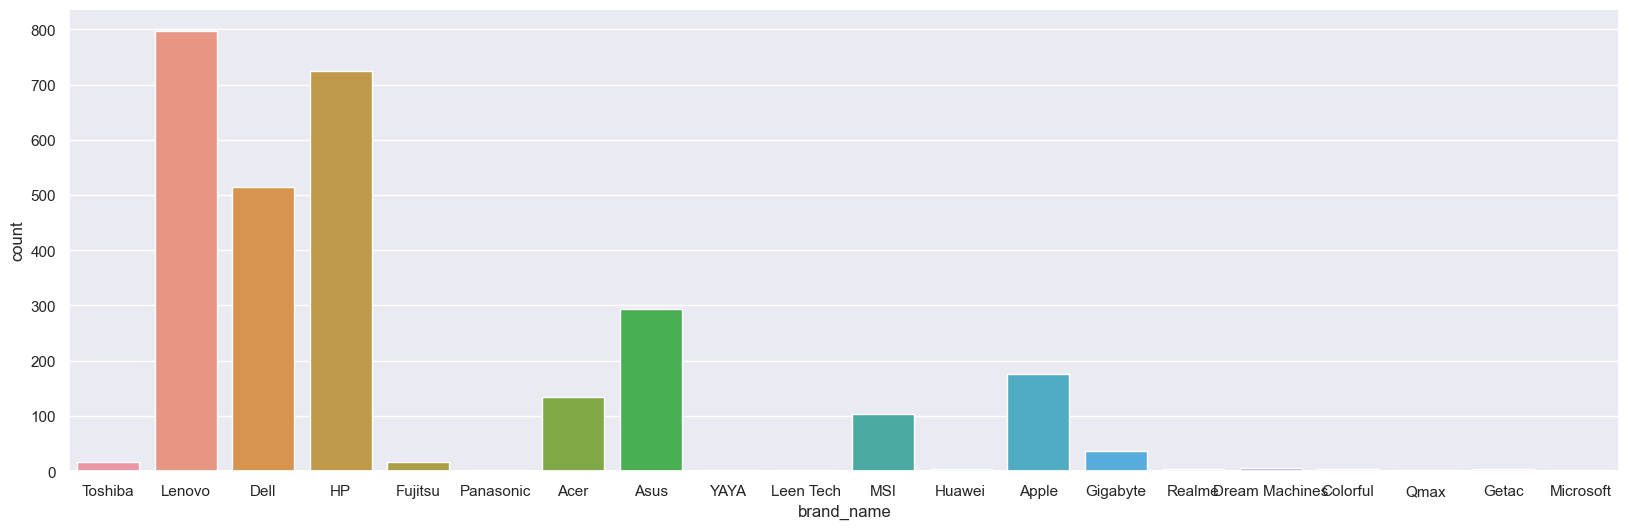

In [71]:
sns.countplot(x=df_final['brand_name'],data=df_final)
# lenovo,HP and Dell are the most popular among people

<AxesSubplot: xlabel='disc-tech', ylabel='count'>

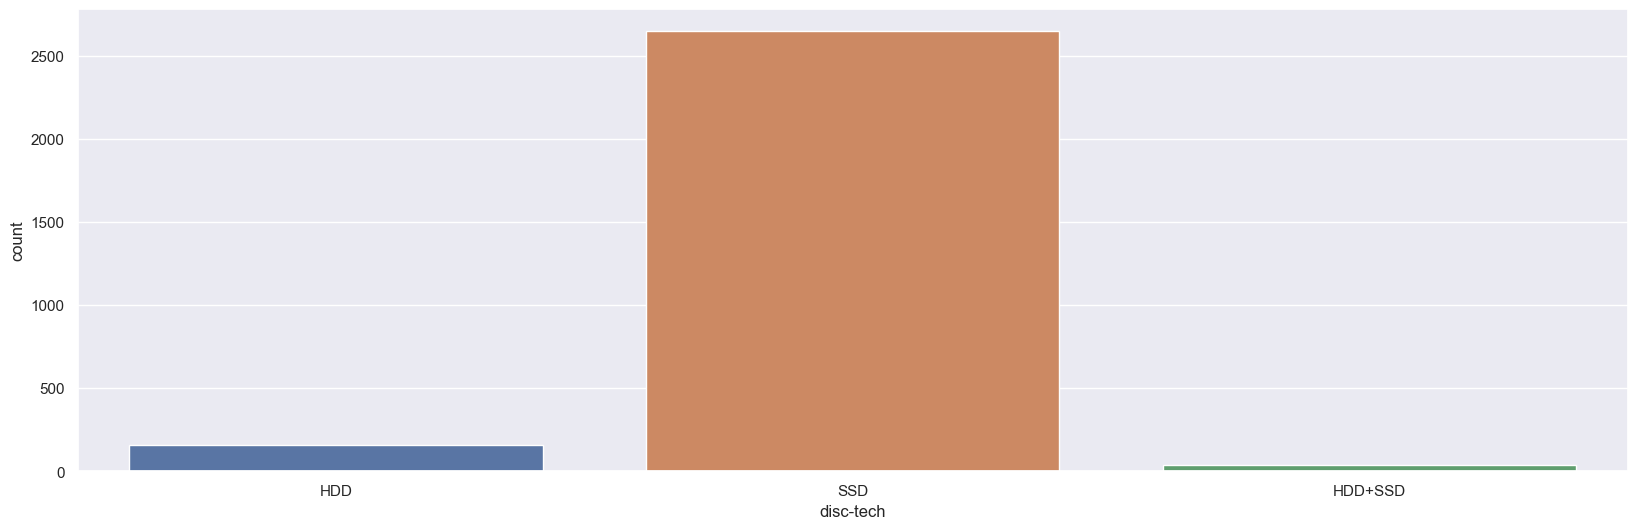

In [72]:
sns.countplot(x=df_final['disc-tech'],data=df_final)

<AxesSubplot: xlabel='brand_name', ylabel='price_in_₸'>

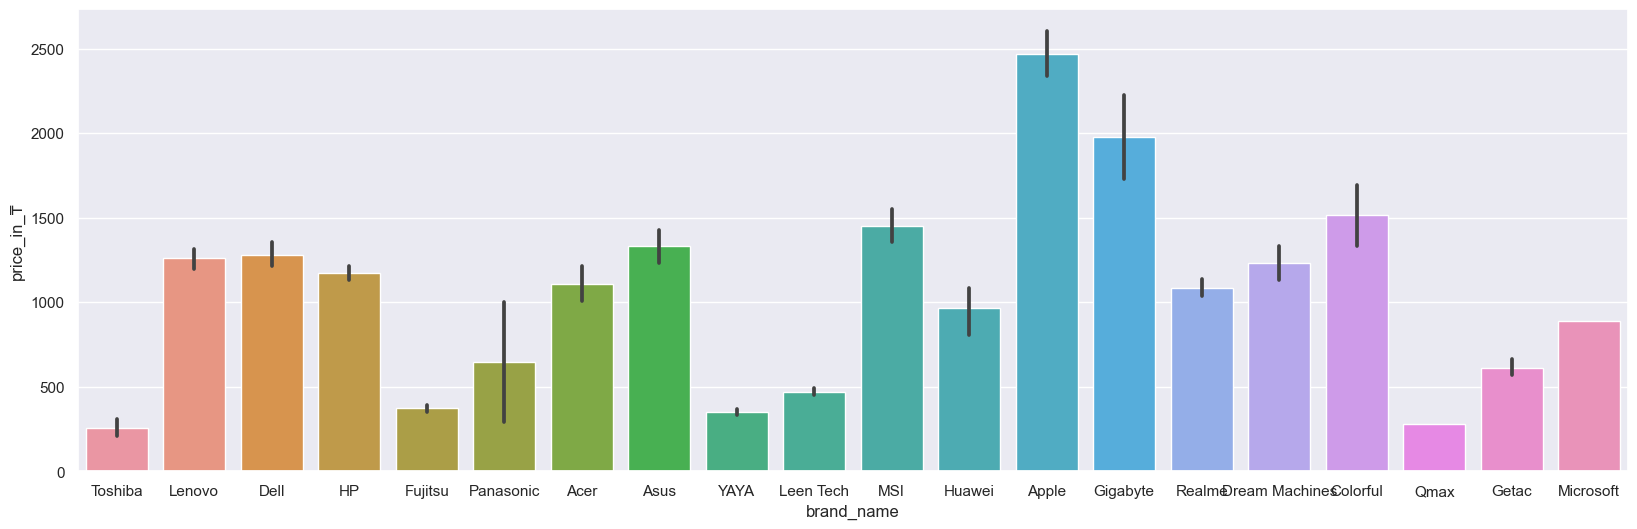

In [73]:
sns.barplot(x=df_final['brand_name'],y=df_final['price_in_₸'],data=df_final,estimator='mean')
# Internet shop mainly takes money from Apple and Gigabyte brands

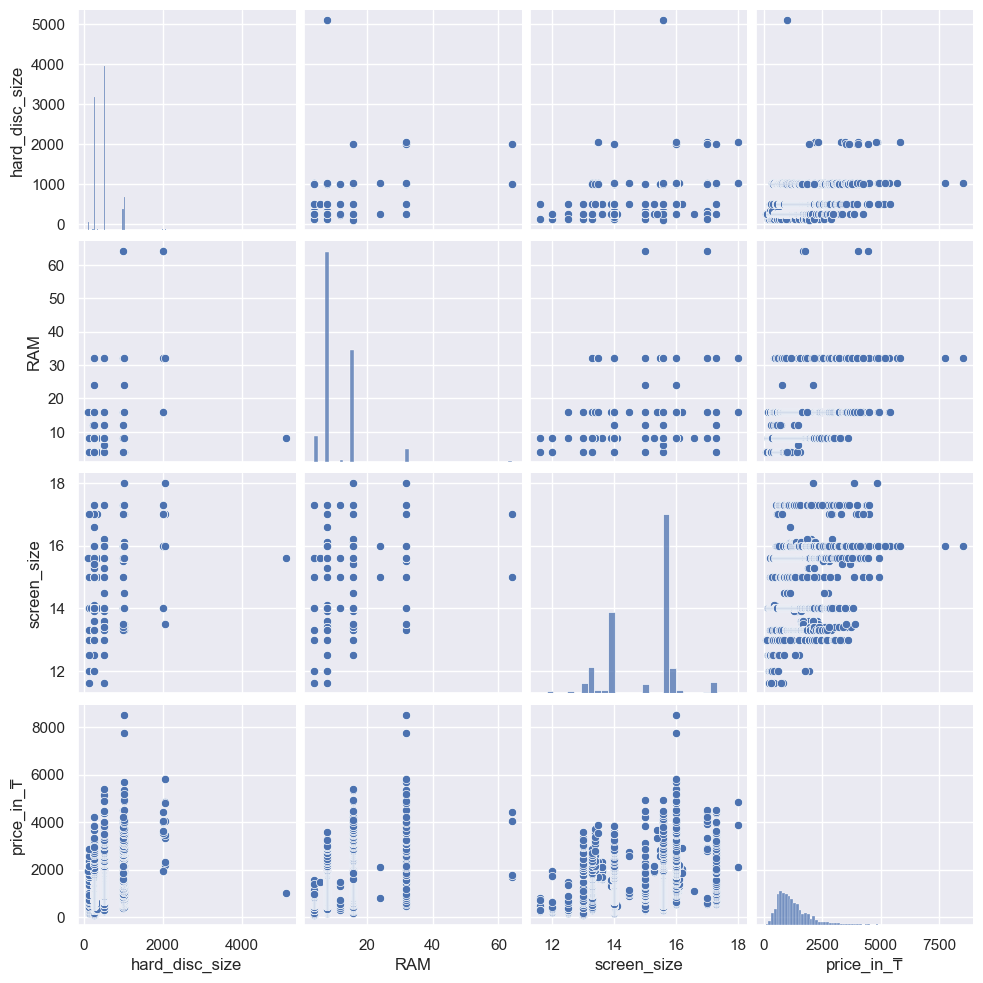

In [74]:
sns.pairplot(df_final)

In [75]:
df_final.drop(['laptop_name'],axis=1,inplace=True)

In [76]:
df_final.head()

,brand_name,hard_disc_size,disc-tech,RAM,screen_size,price_in_₸
0,Toshiba,250,HDD,4,13.0,86.226005
1,Toshiba,250,HDD,4,13.0,103.958860
2,Toshiba,250,HDD,4,13.0,149.620960
3,Toshiba,250,HDD,4,13.0,174.890278
4,Lenovo,256,SSD,16,12.5,177.106885


In [77]:
df_final.shape

(2845, 6)

Encoding of categorical data

In [78]:
import category_encoders as ce

In [79]:
encoder = ce.OneHotEncoder(cols=['brand_name','disc-tech'])

In [80]:
df_encoded = df_final.copy()

In [81]:
df_encoded = encoder.fit_transform(df_encoded)

In [82]:
df_encoded.head()

,brand_name_1,brand_name_2,brand_name_3,brand_name_4,brand_name_5,brand_name_6,brand_name_7,brand_name_8,brand_name_9,brand_name_10,...,brand_name_18,brand_name_19,brand_name_20,hard_disc_size,disc-tech_1,disc-tech_2,disc-tech_3,RAM,screen_size,price_in_₸
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,250,1,0,0,4,13.0,86.226005
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,250,1,0,0,4,13.0,103.958860
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,250,1,0,0,4,13.0,149.620960
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,250,1,0,0,4,13.0,174.890278
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,256,0,1,0,16,12.5,177.106885


In [83]:
df_encoded.shape

(2845, 27)

In [84]:
sns.set(rc={"figure.figsize":(15, 10)}) 

C:\Users\askha\AppData\Local\Temp\ipykernel_4208\4277794465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<AxesSubplot: >

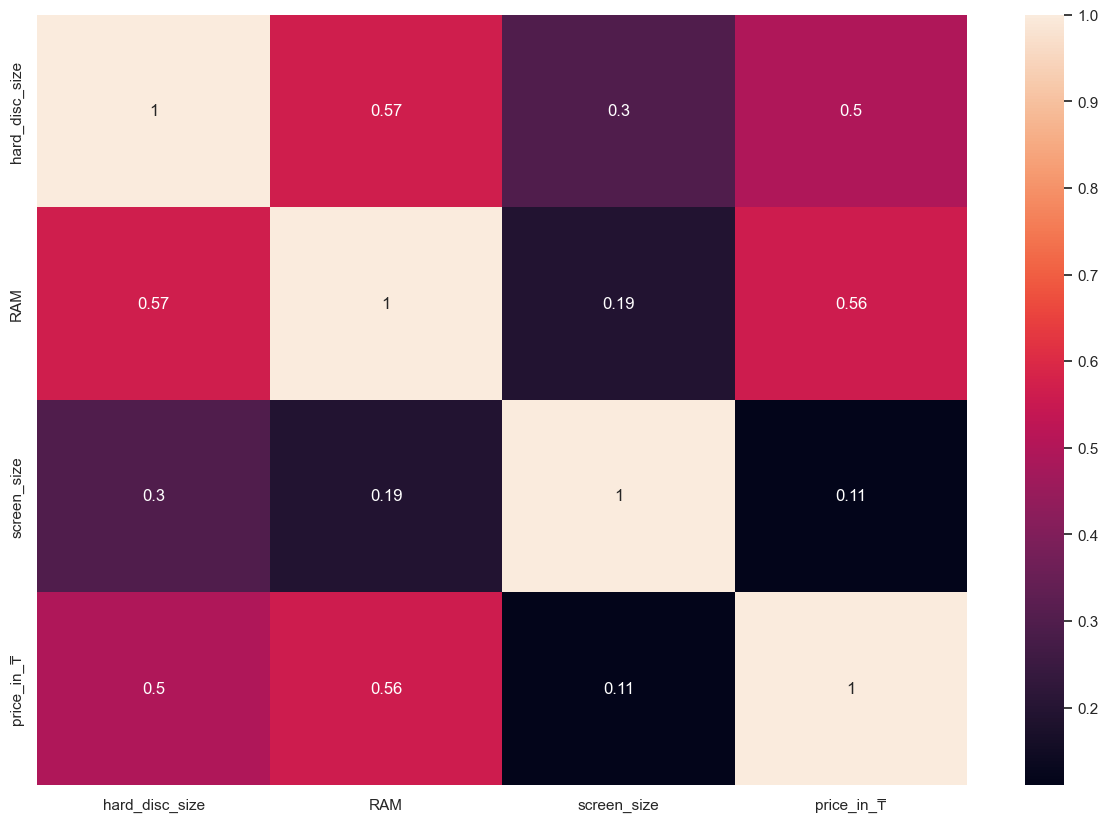

In [101]:
sns.heatmap(df.corr(),annot=True)

# Implementation of algorithm without hyperparameter tuning

In [86]:
from sklearn.model_selection import train_test_split
from catboost import CatBoostRegressor 
from sklearn.metrics import mean_squared_error,r2_score
import optuna

In [87]:
x = df_final.drop(['price_in_₸'],axis=1)
y = df_final[['price_in_₸']]

In [88]:
# using the train test split function  
x_train,x_test,y_train, y_test = train_test_split(x,y , 
                                   random_state=104,  
                                   test_size=0.3) 

In [89]:
#features for auto encoding 
cat_features = ['brand_name','disc-tech']

Trying algorithm without fine tuning

In [90]:
from catboost import CatBoostRegressor
model = CatBoostRegressor(cat_features=cat_features).fit(x_train,y_train)

Learning rate set to 0.045649
0:	learn: 827.3439432	total: 21.4ms	remaining: 21.4s
1:	learn: 809.7029848	total: 44.1ms	remaining: 22s
2:	learn: 793.7009111	total: 73ms	remaining: 24.3s
3:	learn: 778.1779088	total: 90.6ms	remaining: 22.6s
4:	learn: 762.7599012	total: 115ms	remaining: 23s
5:	learn: 747.8311426	total: 124ms	remaining: 20.6s
6:	learn: 734.0620426	total: 137ms	remaining: 19.5s
7:	learn: 720.8158284	total: 151ms	remaining: 18.8s
8:	learn: 709.0428866	total: 159ms	remaining: 17.5s
9:	learn: 698.2422804	total: 165ms	remaining: 16.4s
10:	learn: 687.3452882	total: 181ms	remaining: 16.3s
11:	learn: 677.5283181	total: 192ms	remaining: 15.8s
12:	learn: 668.0367451	total: 198ms	remaining: 15.1s
13:	learn: 659.0068354	total: 211ms	remaining: 14.9s
14:	learn: 650.6474153	total: 218ms	remaining: 14.3s
15:	learn: 643.7891320	total: 229ms	remaining: 14.1s
16:	learn: 636.9809029	total: 237ms	remaining: 13.7s
17:	learn: 629.9872619	total: 243ms	remaining: 13.3s
18:	learn: 623.9492828	total

In [91]:
y_pred = model.predict(x_test)
mean_squared_error(y_test,y_pred,squared=False)

464.20154619005655

In [92]:
r2_score(y_test,y_pred)

0.6615543234652722

Trying algorithm using Optuna

In [93]:
def objective(trial):
    params = {
        "iterations": trial.suggest_int("iterations",100,1000,step=100),
        "learning_rate": trial.suggest_float("learning_rate", 1e-3, 0.1, log=True),
        "depth": trial.suggest_int("depth", 1, 10),
        "subsample": trial.suggest_float("subsample", 0.05, 1.0,log=True),
        "colsample_bylevel": trial.suggest_float("colsample_bylevel", 0.05, 1.0,log=True),
        "min_data_in_leaf": trial.suggest_int("min_data_in_leaf", 1, 100),
    }

    model = CatBoostRegressor(**params, silent=True,cat_features=cat_features)
    model.fit(x_train, y_train)
    predictions = model.predict(x_test)
    rmse = mean_squared_error(y_test, predictions, squared=False)
    return rmse

In [94]:
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=75)

[I 2024-03-20 23:59:28,310] A new study created in memory with name: no-name-fbde12f0-23d8-4996-80e3-a2217746e118
[I 2024-03-20 23:59:29,052] Trial 0 finished with value: 718.3047798198362 and parameters: {'iterations': 800, 'learning_rate': 0.002462425759272871, 'depth': 10, 'subsample': 0.6617938829126703, 'colsample_bylevel': 0.06584083839646043, 'min_data_in_leaf': 49}. Best is trial 0 with value: 718.3047798198362.
[I 2024-03-20 23:59:31,464] Trial 1 finished with value: 485.7471642278292 and parameters: {'iterations': 800, 'learning_rate': 0.049624169144921446, 'depth': 3, 'subsample': 0.08402241877666179, 'colsample_bylevel': 0.3547233416307386, 'min_data_in_leaf': 76}. Best is trial 1 with value: 485.7471642278292.
[I 2024-03-20 23:59:38,704] Trial 2 finished with value: 464.0735913392932 and parameters: {'iterations': 900, 'learning_rate': 0.03860379616318338, 'depth': 9, 'subsample': 0.05990497368008857, 'colsample_bylevel': 0.3333355907097545, 'min_data_in_leaf': 4}. Best is

In [95]:
print('Best hyperparameters:', study.best_params)
print('Best RMSE:', study.best_value)

Best hyperparameters: {'iterations': 800, 'learning_rate': 0.0287222206640252, 'depth': 10, 'subsample': 0.06806822960974135, 'colsample_bylevel': 0.38134214841644754, 'min_data_in_leaf': 69}
Best RMSE: 457.4688751332352


In [97]:
model = CatBoostRegressor(iterations=800,learning_rate= 0.0287222206640252,depth=10,subsample=0.06806822960974135,colsample_bylevel=0.38134214841644754,min_data_in_leaf=69).fit(x_train,y_train,cat_features=cat_features)

0:	learn: 833.5331220	total: 18.7ms	remaining: 14.9s
1:	learn: 822.1901059	total: 47.7ms	remaining: 19s
2:	learn: 812.2685847	total: 84.5ms	remaining: 22.5s
3:	learn: 806.5411099	total: 88.9ms	remaining: 17.7s
4:	learn: 798.0964422	total: 93.9ms	remaining: 14.9s
5:	learn: 787.9895644	total: 110ms	remaining: 14.6s
6:	learn: 777.1527342	total: 139ms	remaining: 15.8s
7:	learn: 767.0018727	total: 148ms	remaining: 14.7s
8:	learn: 757.8602386	total: 161ms	remaining: 14.1s
9:	learn: 749.5676897	total: 177ms	remaining: 13.9s
10:	learn: 744.0712465	total: 181ms	remaining: 13s
11:	learn: 738.5949108	total: 185ms	remaining: 12.2s
12:	learn: 736.3350554	total: 189ms	remaining: 11.4s
13:	learn: 729.8548551	total: 193ms	remaining: 10.9s
14:	learn: 723.0921814	total: 206ms	remaining: 10.8s
15:	learn: 715.8500138	total: 216ms	remaining: 10.6s
16:	learn: 709.1216586	total: 229ms	remaining: 10.5s
17:	learn: 701.5886328	total: 244ms	remaining: 10.6s
18:	learn: 694.5513228	total: 255ms	remaining: 10.5s
19

In [98]:
y_pred = model.predict(x_test)

In [99]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_pred,squared=False)

457.4688751332352

R2-score and MSE go up with fine tuning,but not so considerably.

In [100]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.6713006027387924